In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import powerlaw

## Spread Locator: A Statistical Distribution Analysis Model

In [24]:
dataset = pd.read_csv("spread_locator_dataset - spread_locator_dataset.csv")
dataset

,transaction_id,customer_id,transaction_amount,transaction_date,transaction_count,region,transaction_status
0,e98aa092-3770-4fdb-9502-5b5a6a244811,CUST2824,3821.34,2023-01-26,3,North,Fail
1,11ba6918-dba0-41e5-96cf-f5a7b95f0103,CUST1409,2781.84,2023-01-28,0,East,Fail
2,82b7654b-6eb7-4579-89a0-1a9edec0a7bb,CUST5506,4120.97,2023-01-28,0,South,Fail
3,f7166574-f400-4d53-b526-0b11f6619ddf,CUST5012,6383.78,2023-01-18,2,South,Success
4,8632fe26-b507-4068-9c68-1b2fa04fecb3,CUST4657,2651.61,2023-01-04,4,North,Success
...,...,...,...,...,...,...,...
215,10c2a8f2-89d0-485c-bf8f-9508d32a02fc,CUST5563,4356.76,2023-01-12,2,South,Fail
216,5618814b-f7e2-424d-9617-9fc8d8643370,CUST8579,2025.53,2023-01-29,6,South,Fail
217,5636c9e7-9d54-4654-9c89-fdf31be87d96,CUST5092,2648.08,2023-01-30,1,West,Fail
218,6ba09450-a455-4983-bbad-3dad292cc839,CUST2235,2338.62,2023-01-26,3,North,Success


##### Part - B Data Analysis And Testing Tasks:

# Q 1

#### Fit the data to Bernoulli and Binomial distributions (transaction occurrence & weekly count).

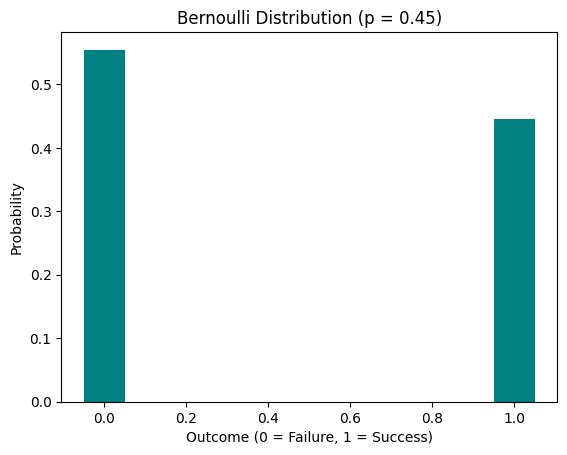

Probability of success (p): 0.45
Probability of failure (1-p): 0.55


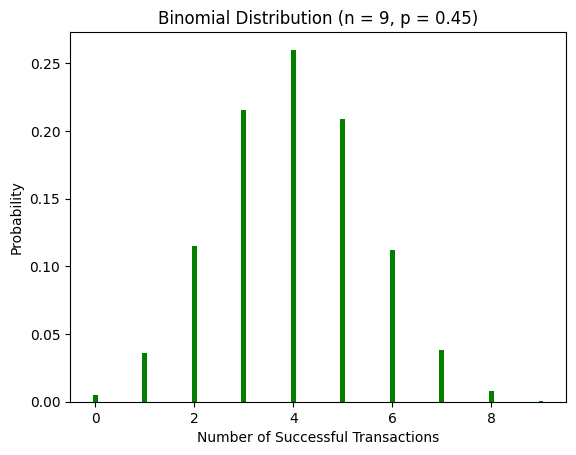

Probability of 0 successful transactions: 0.0050
Probability of 1 successful transactions: 0.0359
Probability of 2 successful transactions: 0.1152
Probability of 3 successful transactions: 0.2159
Probability of 4 successful transactions: 0.2602
Probability of 5 successful transactions: 0.2090
Probability of 6 successful transactions: 0.1119
Probability of 7 successful transactions: 0.0385
Probability of 8 successful transactions: 0.0077
Probability of 9 successful transactions: 0.0007


In [35]:
# convert transaction_status column's values are in numeric form
dataset["transaction_outcome"] = np.where(dataset["transaction_status"]=="Success",1,0)

# calculate the mean of success
p = dataset["transaction_outcome"].mean()


# Step 4: Generate and plot the probability mass function (PMF) for the Bernoulli distribution
rv = stats.bernoulli(p)
x = [0, 1]  
pmf = rv.pmf(x)

# Plot the PMF
plt.bar(x, pmf, width=0.1,color="teal")
plt.xlabel('Outcome (0 = Failure, 1 = Success)')
plt.ylabel('Probability')
plt.title(f'Bernoulli Distribution (p = {p:.2f})')
plt.show()

# Step 5: Print the probability of success (p) and failure (1-p)
print(f'Probability of success (p): {p:.2f}')
print(f'Probability of failure (1-p): {1 - p:.2f}')


n = dataset['transaction_count'].max()
binom_rv = stats.binom(n, p)

# Step 7: Generate and plot the PMF for Binomial distribution
binom_x = list(range(n + 1))
binom_pmf = binom_rv.pmf(binom_x)

# Plot the PMF for Binomial
plt.bar(binom_x, binom_pmf, color='green', width=0.1)
plt.xlabel('Number of Successful Transactions')
plt.ylabel('Probability')
plt.title(f'Binomial Distribution (n = {n}, p = {p:.2f})')
plt.show()

# Step 8: Print the probability mass function for Binomial distribution at each possible outcome
for x_val, prob in zip(binom_x, binom_pmf):
    print(f'Probability of {x_val} successful transactions: {prob:.4f}') 

# Q 2

#### Fit the data to Poisson distribution (number of transactions per day).

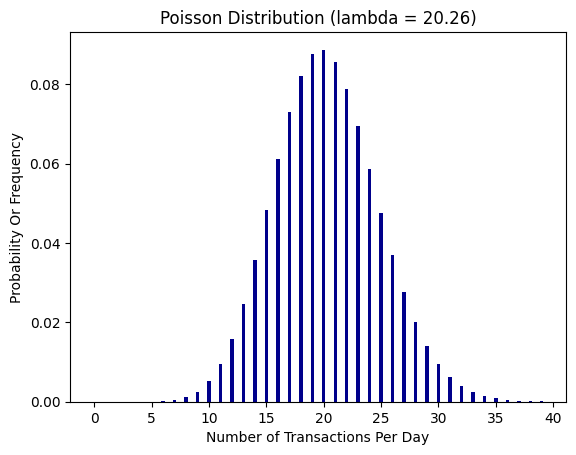

Probability of 0 transactions per day: 0.0000
Probability of 1 transactions per day: 0.0000
Probability of 2 transactions per day: 0.0000
Probability of 3 transactions per day: 0.0000
Probability of 4 transactions per day: 0.0000
Probability of 5 transactions per day: 0.0000
Probability of 6 transactions per day: 0.0002
Probability of 7 transactions per day: 0.0004
Probability of 8 transactions per day: 0.0011
Probability of 9 transactions per day: 0.0025
Probability of 10 transactions per day: 0.0051
Probability of 11 transactions per day: 0.0094
Probability of 12 transactions per day: 0.0159
Probability of 13 transactions per day: 0.0247
Probability of 14 transactions per day: 0.0358
Probability of 15 transactions per day: 0.0484
Probability of 16 transactions per day: 0.0612
Probability of 17 transactions per day: 0.0730
Probability of 18 transactions per day: 0.0821
Probability of 19 transactions per day: 0.0876
Probability of 20 transactions per day: 0.0887
Probability of 21 trans

In [26]:
# First We Will Aggregate the Data By Transaction Date To Get Total Number of Transactions Per Day
day_transaction = dataset.groupby("transaction_date")["transaction_count"].sum()

# Calculating the mean Or lambda
mean = day_transaction.mean()

# Now  we Will Be calculating the poission distribution
poisson_dist = stats.poisson(mean)

# Generate and plot the probability mass function (PMF) for Poisson distribution
y = range(0, int(day_transaction.max()) + 1)
poisson_pmf = poisson_dist.pmf(y)

# Plotting the Poission Distribution
plt.bar(y, poisson_pmf, color='darkblue', width=0.3)
plt.xlabel('Number of Transactions Per Day')
plt.ylabel('Probability Or Frequency')
plt.title(f'Poisson Distribution (lambda = {mean:.2f})')
plt.show()

for transaction_count, prob in zip(y, poisson_pmf):
    print(f'Probability of {transaction_count} transactions per day: {prob:.4f}')

# Q 3

#### Model transaction amounts using Log-Normal and Power Law distributions.

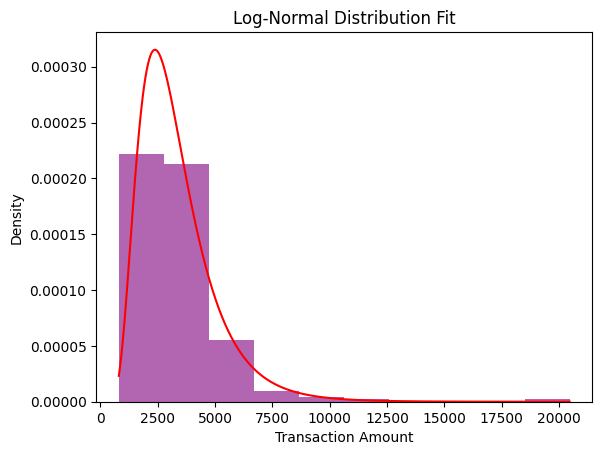

In [27]:
log_amount = dataset["transaction_amount"]

# Making A log Normal Distribution 
shape,loc,scale = stats.lognorm.fit(dataset["transaction_amount"],floc=0)

x = np.linspace(min(log_amount), max(log_amount), 1000)
pdf_lognorm = stats.lognorm.pdf(x, shape, loc=loc, scale=scale)

# Now Ploting The Graph Into Histogram
plt.hist(dataset['transaction_amount'], bins=10, density=True, alpha=0.6, color='purple')
plt.plot(x, pdf_lognorm, color='r', label='Log-Normal Fit')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.title('Log-Normal Distribution Fit')
plt.show()

Calculating best minimal value for power law fit


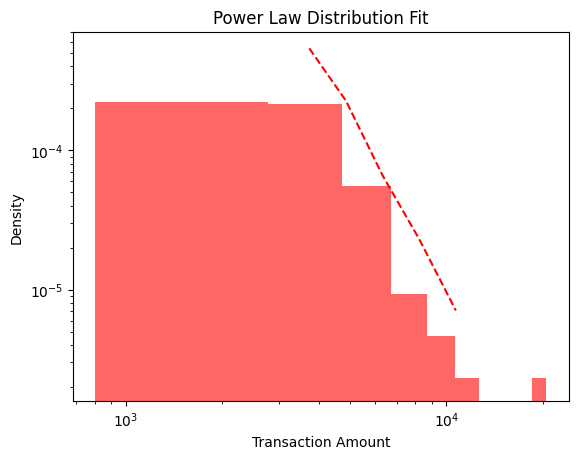

Log-Normal Parameters: Shape = 0.47
Log-Normal Parameters: Loc = 0.00
Log-Normal Parameters: Scale = 2983.16
Power Law Exponent: 4.15


In [28]:
# Step 3: Fit the Power Law distribution using the powerlaw package
power_law = powerlaw.Fit(dataset['transaction_amount'])

# Step 4: Plot the Power Law PDF
plt.hist(dataset['transaction_amount'], bins=10, density=True, alpha=0.6, color='r')
power_law.plot_pdf(color='r', linestyle='--')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.title('Power Law Distribution Fit')
plt.show()

# Step 5: Print the parameters
print(f"Log-Normal Parameters: Shape = {shape:.2f}")
print(f"Log-Normal Parameters: Loc = {loc:.2f}")
print(f"Log-Normal Parameters: Scale = {scale:.2f}")
print(f"Power Law Exponent: {power_law.alpha:.2f}")

# Q 4

#### Generate and interpret a Q-Q Plot to test normality.

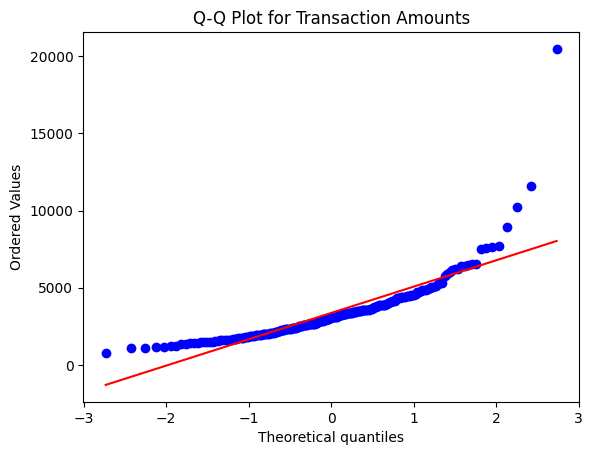

In [29]:
# Generate the Q-Q plot to check for normality
stats.probplot(dataset['transaction_amount'], dist="norm", plot=plt)

# Display the plot
plt.title('Q-Q Plot for Transaction Amounts')
plt.show()

Interpretating The Q-Q Plot

If The Lines Are Away From The Red Line Or Bend Away From It ,the Data may be Either Positively Or Negatively Skewed

# Q 5

#### Apply Box-Cox Transform to stabilize variance.

Optimal lambda for Box-Cox: -0.18


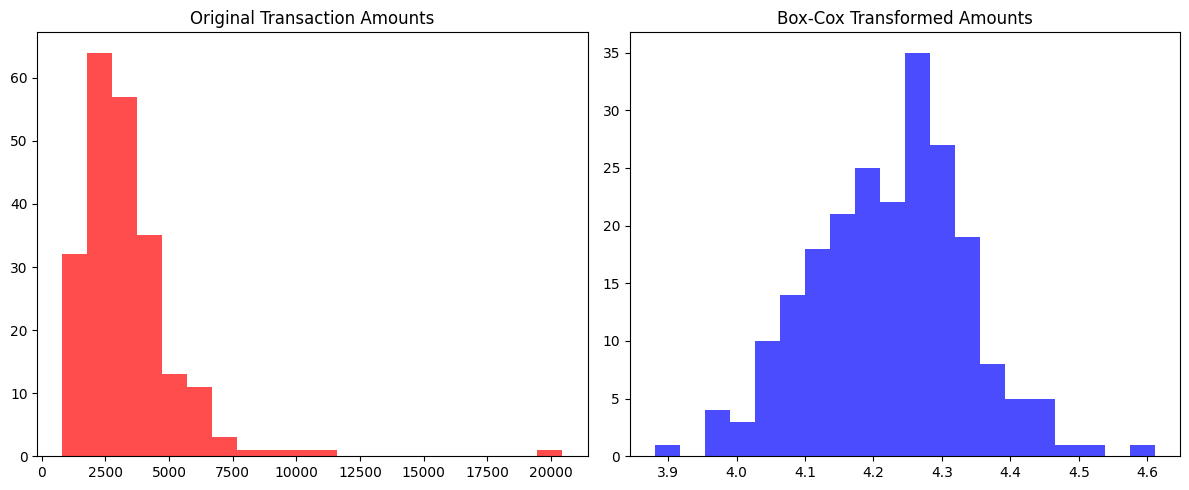

Box-Cox Transformation Lambda: -0.18


In [30]:
amounts_boxcox,fitted_lambda = stats.boxcox(log_amount)
print(f"Optimal lambda for Box-Cox: {fitted_lambda:.2f}")

# Comparing the data
plt.figure(figsize=(12,5))

# Original data histogram
plt.subplot(1,2,1)
plt.hist(log_amount, bins=20, color="red", alpha=0.7)
plt.title("Original Transaction Amounts")

# Transformed data histogram
plt.subplot(1,2,2)
plt.hist(amounts_boxcox, bins=20, color="blue", alpha=0.7)
plt.title("Box-Cox Transformed Amounts")
plt.tight_layout()
plt.show()

# Step 3: Print the Box-Cox transformation parameter (lambda)
print(f"Box-Cox Transformation Lambda: {fitted_lambda:.2f}")

# Q 6

#### Calculate Z-scores for transaction amounts and compute probability of transactions exceeding €5000.

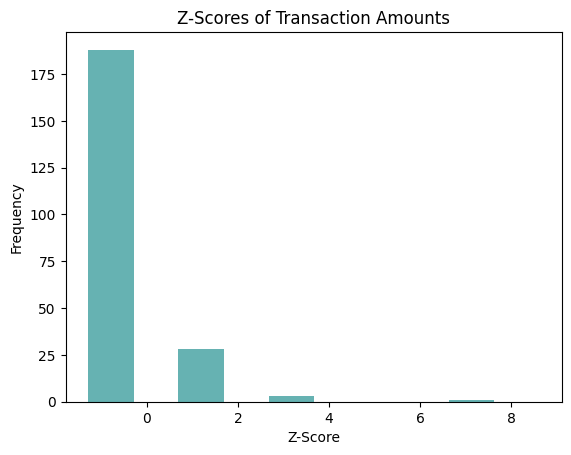

Z-score for ₹5000: 0.82
Probability of a transaction exceeding ₹5000: 0.2052


In [31]:
# calculating the Z-score first.
mean_amounts = log_amount.mean()
std_amounts = log_amount.std()
dataset['z_score'] = (log_amount - mean_amounts)/std_amounts

# Finding the probability for the transaction of ₹5000
z_5000 = (5000 - mean_amounts) / std_amounts

# Now finding the probability of transactions exceeding ₹5000 using the CDF.
above_5000 = 1-stats.norm.cdf(5000,mean_amounts,std_amounts)

# Visualizing the data for the better understanding
plt.hist(dataset['z_score'], bins=5, color='teal', alpha=0.6, width=1)
plt.title('Z-Scores of Transaction Amounts')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.show()
print(f"Z-score for ₹5000: {z_5000:.2f}")
print(f"Probability of a transaction exceeding ₹5000: {above_5000:.4f}")

# Q 7

#### Plot and interpret PDF and CDF for transaction amounts.

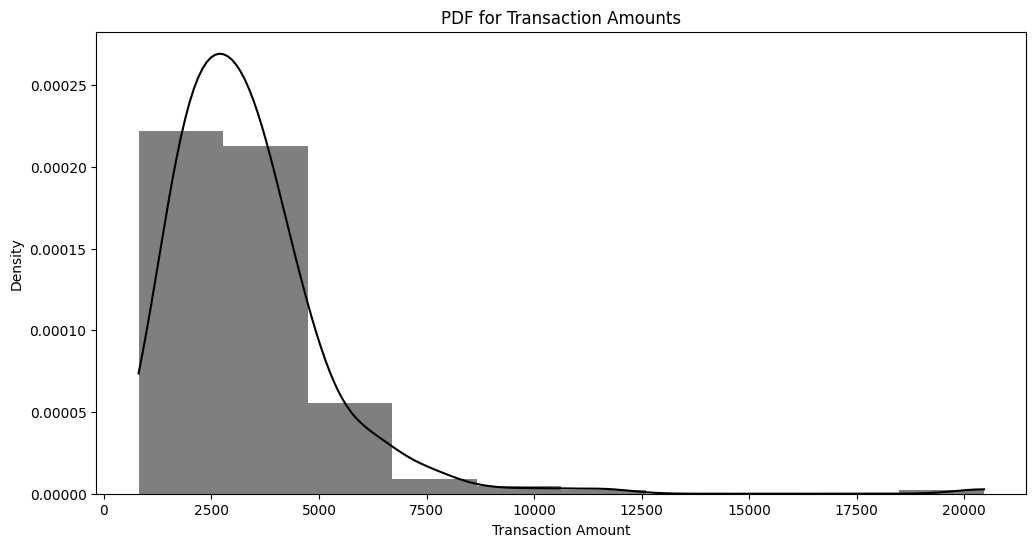

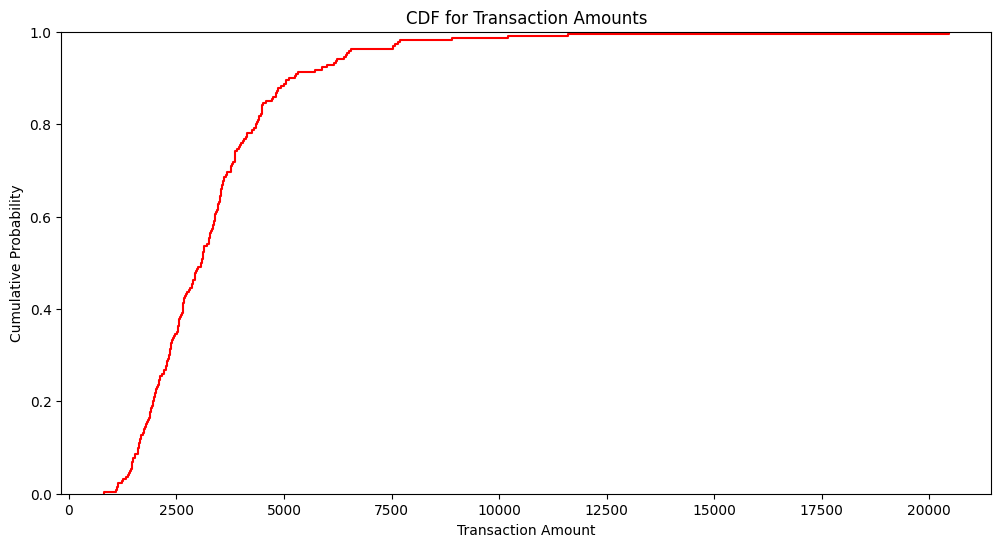

In [32]:
# Plotting the PDF (Probability Density Function) for transaction amounts
plt.figure(figsize=(12, 6))
sns.histplot(dataset['transaction_amount'], kde=True, color='black', bins=10, stat='density', linewidth=0)
plt.title('PDF for Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.show()

# Plotting the CDF (Cumulative Distribution Function) for transaction amounts
plt.figure(figsize=(12, 6))
sns.ecdfplot(dataset['transaction_amount'], color='red')
plt.title('CDF for Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Cumulative Probability')
plt.show()

1. PDF (Probability Density Function)

    The PDF shows how likely different transaction amounts are.

    For your data:

    Small to medium amounts have high density (more common).

    Large amounts (the right tail) have very low density (rare events).

2. CDF (Cumulative Distribution Function)

    The CDF shows the probability that a transaction amount is less than or equal to a certain value.

    For your data:

    At the median amount (50th percentile), the CDF ≈ 0.5 (half of transactions are smaller, half larger).

    At the 90th percentile, the CDF ≈ 0.9 (90% of transactions are ≤ that amount, only 10% are bigger).

    The CDF is smoother and easier to interpret for percentiles and thresholds.

# Q 8

#### Conclude which distribution best fits the dataset and justify insights for decision-making

Log-Normal distribution (for transaction amounts)

Why:

Transaction amounts are strictly positive and highly skewed.

The log-normal fit matches the bulk of the data and the tail better than Normal.

It also makes interpretation easy: when you log the amounts, they behave close to Normal.